1.Installing **libraries**

In [2]:
!pip install pandas numpy matplotlib vaderSentiment wordcloud


# 2 **Importing** libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

pd.set_option('display.max_colwidth', 200)


In [9]:
from google.colab import files
uploaded = files.upload()  # pick student_event_feedback.csv

df = pd.read_csv('student_event_feedback_with_sentiment (1).csv')
df.head()

Saving student_event_feedback_with_sentiment.csv to student_event_feedback_with_sentiment (3).csv


,timestamp,event_name,event_type,department,rating,feedback_comment,satisfaction_bucket,comment_length,word_count,sentiment_score,sentiment_label
0,02-11-2024 04:18,AI Ethics in Industry,Guest Lecture,CSE,2,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning.",Low,91,13,0.0000,Neutral
1,07-09-2024 17:17,UX Research in the Wild,Guest Lecture,CHE,4,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace.",High,72,12,0.7003,Positive
2,21-07-2025 04:46,Intro to Machine Learning,Workshop,CHE,5,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot.",High,68,11,0.3818,Positive
3,14-08-2025 23:33,Smart City Hack,Hackathon,BIO,2,"Smart City Hack (Hackathon) had issues with wifi, timing, seating.",Low,66,10,0.4019,Positive
4,10-10-2024 23:06,Green Energy Futures,Seminar,CE,4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace.",High,88,11,0.8720,Positive


# 3.Uploading csv excel file

In [7]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
df = df.drop_duplicates()
print(df.shape)
df.head()

(1000, 11)


,timestamp,event_name,event_type,department,rating,feedback_comment,satisfaction_bucket,comment_length,word_count,sentiment_score,sentiment_label
0,02-11-2024 04:18,AI Ethics in Industry,Guest Lecture,CSE,2,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning.",Low,91,13,0.0000,Neutral
1,07-09-2024 17:17,UX Research in the Wild,Guest Lecture,CHE,4,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace.",High,72,12,0.7003,Positive
2,21-07-2025 04:46,Intro to Machine Learning,Workshop,CHE,5,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot.",High,68,11,0.3818,Positive
3,14-08-2025 23:33,Smart City Hack,Hackathon,BIO,2,"Smart City Hack (Hackathon) had issues with wifi, timing, seating.",Low,66,10,0.4019,Positive
4,10-10-2024 23:06,Green Energy Futures,Seminar,CE,4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace.",High,88,11,0.8720,Positive


### 4.Data cleaning

In [8]:
analyzer = SentimentIntensityAnalyzer()

def label_sentiment(score):
    if score <= -0.05: return 'Negative'
    elif score >= 0.05: return 'Positive'
    else: return 'Neutral'

df['sentiment_score'] = df['feedback_comment'].astype(str).apply(lambda t: analyzer.polarity_scores(t)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

df[['feedback_comment','sentiment_score','sentiment_label']].head()

,feedback_comment,sentiment_score,sentiment_label
0,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning.",0.0000,Neutral
1,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace.",0.7003,Positive
2,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot.",0.3818,Positive
3,"Smart City Hack (Hackathon) had issues with wifi, timing, seating.",0.4019,Positive
4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace.",0.8720,Positive


5.Sentiment analysis

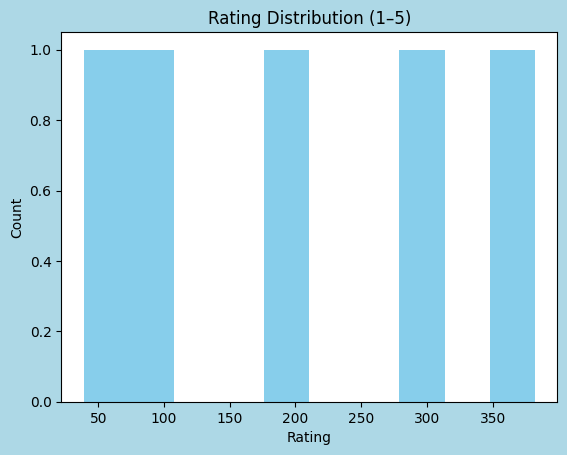

In [24]:
fig, ax = plt.subplots(facecolor='lightblue')
df['rating'].value_counts().sort_index().plot(kind='hist', color='skyblue', ax=ax)
plt.title("Rating Distribution (1–5)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# 6.Visualization. Rating **distribution**

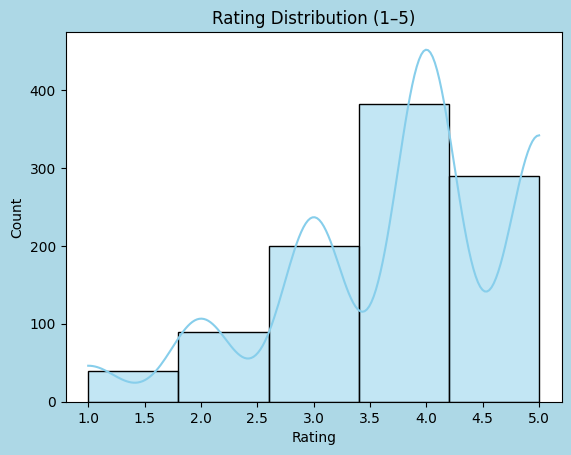

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(facecolor='lightblue')
sns.histplot(data=df, x='rating', bins=5, kde=True, color='skyblue')
plt.title("Rating Distribution (1–5)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

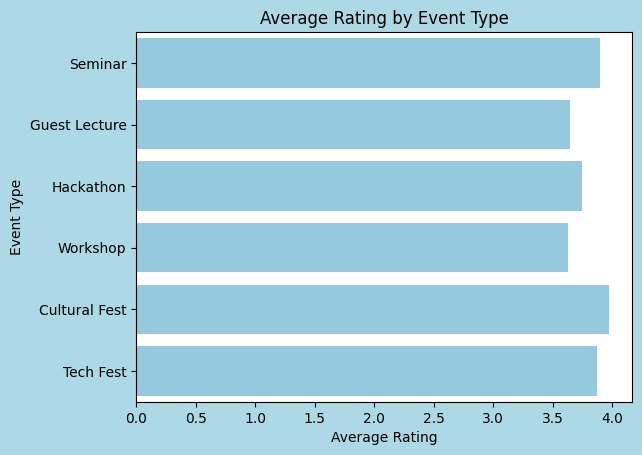

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(facecolor='lightblue')
sns.barplot(x='rating', y=df.groupby('event_type')['rating'].mean().sort_values().index, data=df.groupby('event_type')['rating'].mean().reset_index(), color='skyblue')
plt.title("Average Rating by Event Type")
plt.xlabel("Average Rating")
plt.ylabel("Event Type")
plt.show()

In [34]:
import plotly.express as px

sentiment_counts = df['sentiment_label'].value_counts()
fig = px.pie(sentiment_counts,
             values=sentiment_counts.values,
             names=sentiment_counts.index,
             title='Sentiment Distribution (Interactive)')
fig.update_layout(plot_bgcolor='lightblue')
fig.show()

7.Survey ***insights***

In [37]:
print(df.groupby('event_name')['rating'].mean().sort_values(ascending=False).head(3))

print("Correlation:", df[['rating','sentiment_score']].corr().iloc[0,1])

neg = df[df['sentiment_label']=='Negative']['feedback_comment'].str.lower()
neg = neg.str.replace(f"[{string.punctuation}]", " ", regex=True)
tokens = " ".join(neg).split()
stop = set(STOPWORDS) | {'event','events','workshop','seminar','fest','cultural','guest','lecture'}
tokens = [t for t in tokens if t not in stop and len(t) > 3]
print(Counter(tokens).most_common(15))

event_name
IoT & Robotics Arena      4.269231
24hr HealthTech Hack      4.160000
ByteBlast Coding Games    4.111111
Name: rating, dtype: float64
Correlation: 0.7068709045739533
[('campus', 18), ('problem', 18), ('solver', 18), ('hackathon', 18), ('issues', 7), ('room', 4), ('adequate', 4), ('timing', 4), ('interactive', 4), ('basic', 3), ('seating', 3), ('average', 3), ('experience', 3), ('topics', 3), ('fine', 3)]


8.Export **results**

In [21]:
df.to_csv("student_event_feedback_with_sentiment.csv", index=False)

from google.colab import files
files.download("student_event_feedback_with_sentiment.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Visualize the top 3 events by average rating, the correlation between rating and sentiment score, and the most common words in negative feedback. Summarize the key findings. Use the dataframe `df`.

## Visualize top rated events

### Subtask:
Create a bar chart showing the average rating for the top 3 events.


**Reasoning**:
Calculate the average rating for each event, select the top 3, and then create an interactive bar plot to visualize them.



In [36]:
import plotly.express as px

top_events = df.groupby('event_name')['rating'].mean().sort_values(ascending=False).head(3)

fig = px.bar(x=top_events.values,
             y=top_events.index,
             orientation='h',
             title='Top 3 Events by Average Rating')
fig.update_layout(xaxis_title="Average Rating", yaxis_title="Event Name")
fig.show()